In [2]:
import math
import pickle


def dist(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)


def preprocessor(infile, numDocLines):
    infile = open(infile, "r")

    for i in range(numDocLines):
        infile.readline()

    coordMatrix = infile.read()
    coordMatrix = coordMatrix.split("\n")
    coordMatrix.pop(-1)
    coordMatrix.pop(-1)

    for i in range(len(coordMatrix)):
        coordMatrix[i] = coordMatrix[i].split()[1:]
        for j in range(len(coordMatrix[i])):
            coordMatrix[i][j] = float(coordMatrix[i][j])

    distMatrix = []
    for i in range(len(coordMatrix)):
        distMatrix.append([])
        if i % 1000 == 0:
            print(i, "rows written")
        for j in range(len(coordMatrix)):
            distMatrix[i].append(dist(coordMatrix[i], coordMatrix[j]))

    print()
    print()
    print()
    print("Alls rows written")
    print("Pickle being written")
    pList = open("luxembourgPickle.pk1", 'wb')
    pickle.dump(distMatrix, pList)


preprocessor("lu980.tsp", 7)

0 rows written



Alls rows written
Pickle being written


loading pickle
pickle loaded
Iteration: 0
X Pct Convergence: 0.004
Y Pct Convergence: 0.004
Max fitness: 0
Avg fitness: 0.0

Iteration: 1
X Pct Convergence: 0.024
Y Pct Convergence: 0.024
Max fitness: 294040.23908677767
Avg fitness: 305231.6205329186

Iteration: 2
X Pct Convergence: 0.06
Y Pct Convergence: 0.06
Max fitness: 297837.6219127794
Avg fitness: 304469.2844685262

Iteration: 3
X Pct Convergence: 0.068
Y Pct Convergence: 0.068
Max fitness: 296571.02848883416
Avg fitness: 303714.9498294821

Iteration: 4
X Pct Convergence: 0.08
Y Pct Convergence: 0.08
Max fitness: 296361.80518903135
Avg fitness: 304226.33073790703

Iteration: 5
X Pct Convergence: 0.144
Y Pct Convergence: 0.144
Max fitness: 300436.2875019965
Avg fitness: 304198.4544441924

Iteration: 6
X Pct Convergence: 0.16
Y Pct Convergence: 0.16
Max fitness: 301948.0849422654
Avg fitness: 308327.08971827413

Iteration: 7
X Pct Convergence: 0.144
Y Pct Convergence: 0.144
Max fitness: 299796.0207404811
Avg fitness: 306039.088587

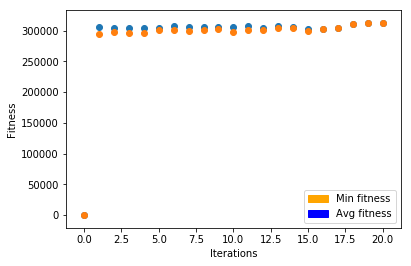

Time to run: 6.498496055603027

Path: [949, 476, 446, 574, 154, 875, 618, 535, 349, 738, 436, 628, 766, 90, 442, 308, 624, 396, 934, 187, 885, 966, 254, 203, 704, 151, 423, 540, 753, 811, 510, 834, 787, 873, 194, 80, 121, 147, 191, 125, 336, 138, 743, 972, 652, 511, 644, 846, 176, 833, 764, 153, 706, 118, 259, 776, 73, 365, 591, 955, 620, 433, 802, 502, 582, 309, 133, 408, 755, 739, 460, 522, 883, 789, 783, 240, 562, 314, 397, 733, 632, 861, 669, 193, 519, 361, 909, 962, 716, 26, 248, 484, 836, 407, 328, 576, 552, 564, 683, 623, 97, 172, 948, 406, 1, 526, 164, 684, 386, 24, 116, 362, 257, 714, 415, 806, 643, 649, 280, 400, 441, 678, 856, 367, 19, 951, 293, 435, 915, 692, 677, 255, 23, 929, 269, 212, 8, 189, 85, 499, 690, 202, 613, 601, 818, 87, 713, 445, 516, 899, 642, 729, 62, 747, 190, 520, 676, 207, 496, 859, 135, 727, 945, 127, 58, 88, 775, 906, 477, 660, 737, 198, 20, 757, 75, 204, 586, 42, 68, 205, 474, 901, 515, 911, 196, 286, 557, 163, 877, 937, 686, 726, 908, 944, 514, 545, 32

In [6]:
#!/usr/bin/python3

from random import randint, random, sample, shuffle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
import time


def fitnessFunc(individual):
    global distances
    path = individual[0]

    # distances = [
    #     [None, 241, 162, 351, 183],
    #     [241, None, 202, 186, 97],
    #     [162, 202, None, 216, 106],
    #     [351, 186, 216, None, 186],
    #     [183, 97, 106, 186, None]
    # ]
    # distances = [
    #     [None, 12, 3, 23, 1, 5, 32, 56],
    #     [12, None, 9, 18, 3, 41, 45, 5],
    #     [3, 9, None, 89, 56, 21, 12, 49],
    #     [23, 18, 89, None, 87, 46, 75, 17],
    #     [1, 3, 56, 87, None, 55, 22, 86],
    #     [5, 41, 21, 46, 55, None, 21, 76],
    #     [32, 45, 12, 75, 22, 21, None, 11],
    #     [56, 5, 49, 17, 86, 76, 11, None]
    # ]

    fitness = 0
    for i in range(len(path) - 1):
        currentCity = path[i]
        nextCity = path[i + 1]
        fitness += distances[currentCity][nextCity]

    fitness += distances[path[0]][path[-1]]

    return fitness


def calculateFitness(population):
    for individual in population:
        fitness = fitnessFunc(individual)
        individual[1] = fitness

    return population


def calcStats(population):
    popSize = len(population)
    lsts = {}
    maxFit = 1000000000
    avgFit = 0

    for individual in population:
        fit = individual[1]

        if fit < maxFit:
            maxFit = fit
        avgFit += fit

        lst = tuple(individual[0])
        if lst not in lsts:
            lsts[lst] = 1
        else:
            lsts[lst] += 1

    avgFit /= len(population)

    maxPctConvergence = 0
    for lst in lsts:
        pctConvergence = lsts[lst] / popSize
        if pctConvergence > maxPctConvergence:
            maxPctConvergence = pctConvergence

    converged = maxPctConvergence > .95

    return converged, maxPctConvergence, maxPctConvergence, maxFit, avgFit


def initPop(populationSize, totalCities):
    population = []

    while len(population) < populationSize:
        cities = list(range(totalCities))
        shuffle(cities)
        individual = [cities, 0]
        population.append(individual)

    return population


def cleanUpChromosomes(individual1, individual2):
    for i in range(1, len(individual1)):
        if individual1[i] not in individual2:
            swapVal1 = individual1.pop(i)
            for j in range(1, len(individual2)):
                if individual2[j] not in individual1:
                    swapVal2 = individual2.pop(j)
                    individual1.insert(i, swapVal2)
                    individual2.insert(j, swapVal1)
                    break

    return individual1, individual2

def ox1(individual1, individual2):
    # stringLength = len(individual1[0])
    #
    # swapIdx1 = randint(1, stringLength - 1)
    # swapIdx2 = randint(1, stringLength - 1)
    #
    # if swapIdx1 > swapIdx2:
    #     bigIdx = swapIdx1 + 1
    #     lilIdx = swapIdx2
    # else:
    #     bigIdx = swapIdx2 + 1
    #     lilIdx = swapIdx1
    #
    # tmp1 = individual1[0][bigIdx:lilIdx]
    # tmp2 = individual2[0][bigIdx:lilIdx]
    # return individual1, individual2
    ind1 = individual1[0]
    ind2 = individual2[0]
    size = min(len(ind1), len(ind2))
    a, b = sample(range(size), 2)
    if a > b:
        a, b = b, a

    holes1, holes2 = [True] * size, [True] * size
    for i in range(size):
        if i < a or i > b:
            holes1[ind2[i]] = False
            holes2[ind1[i]] = False

    # We must keep the original values somewhere before scrambling everything
    temp1, temp2 = ind1, ind2
    k1, k2 = b + 1, b + 1
    for i in range(size):
        if not holes1[temp1[(i + b + 1) % size]]:
            ind1[k1 % size] = temp1[(i + b + 1) % size]
            k1 += 1

        if not holes2[temp2[(i + b + 1) % size]]:
            ind2[k2 % size] = temp2[(i + b + 1) % size]
            k2 += 1

    # Swap the content between a and b (included)
    for i in range(a, b + 1):
        ind1[i], ind2[i] = ind2[i], ind1[i]

    individual1[0] = ind1
    individual2[0] = ind2

    return individual1, individual2



def onePointCrossover(individual1, individual2, stringLength):
    swapIdx = randint(1, stringLength - 1)

    tmp1 = individual1[0][swapIdx:]
    tmp2 = individual2[0][swapIdx:]

    individual1[0] = individual1[0][:swapIdx] + tmp2
    individual2[0] = individual2[0][:swapIdx] + tmp1

    individual1[0], individual2[0] = cleanUpChromosomes(individual1[0], individual2[0])

    return individual1, individual2


def twoPointCrossover(individual1, individual2, stringLength):
    swapIdx1 = randint(1, stringLength - 1)
    swapIdx2 = randint(1, stringLength - 1)
    while swapIdx2 == swapIdx1:
        swapIdx2 = randint(1, stringLength - 1)

    if swapIdx1 > swapIdx2:
        bigIdx = swapIdx1 + 1
        lilIdx = swapIdx2
    else:
        bigIdx = swapIdx2 + 1
        lilIdx = swapIdx1

    tmp1 = individual1[0][lilIdx:bigIdx]
    tmp2 = individual2[0][lilIdx:bigIdx]

    individual1[0] = individual1[0][:lilIdx] + tmp2 + individual1[0][bigIdx:]
    individual2[0] = individual2[0][:lilIdx] + tmp1 + individual2[0][bigIdx:]

    individual1[0], individual2[0] = cleanUpChromosomes(individual1[0], individual2[0])

    return individual1, individual2


def crossoverProcess(population, crossoverRate, crossoverPoints):
    stringLength = 8

    if crossoverPoints == 1:
        crossoverStrategy = onePointCrossover
    else:
        crossoverStrategy = twoPointCrossover

    for i in range(len(population)):
        if random() < crossoverRate:
            secondParentIdx = i
            while secondParentIdx == i:
                secondParentIdx = randint(0, len(population) - 1)
            population[i], population[secondParentIdx] = ox1(population[i],
                                                             population[secondParentIdx])

    return population


def mutate(individual, stringLength):
    idx1 = randint(1, stringLength - 1)
    idx2 = randint(1, stringLength - 1)
    while idx1 == idx2:
        idx2 = randint(1, stringLength - 1)

    if idx1 > idx2:
        bigidx = idx1
        lilidx = idx2
    else:
        bigidx = idx2
        lilidx = idx1

    tmp = individual[0][bigidx:lilidx]
    individual[0][bigidx:lilidx] = tmp[::-1]

    return individual


def mutationProcess(population, mutationRate):
    stringLength = 8

    for i in range(len(population)):
        if random() < (mutationRate * stringLength):
            population[i] = mutate(population[i], stringLength)

    return population


def populationTournament(population, n):
    popSize = len(population)
    newPop = []

    while len(newPop) < popSize:
        individuals = []
        for i in range(n):
            idx = randint(0, popSize - 1)
            individual = population[idx]
            individuals.append(individual)

        winner = min(individuals, key=lambda x: x[1])[0]
        newPop.append([winner, fitnessFunc([winner, 0])])

    return newPop


def printStats(maxFit, avgFit, xpct, ypct, iter):
    print("Iteration:", iter)
    print("X Pct Convergence:", xpct)
    print("Y Pct Convergence:", ypct)
    print("Max fitness:", maxFit)
    print("Avg fitness:", avgFit)
    print()


def getGenes(pop):
    xlist = []
    ylist = []
    fitness = []

    for individual in pop:
        x = int.from_bytes(individual[0][:2], 'big', signed=False)
        y = int.from_bytes(individual[0][2:], 'big', signed=False)
        xlist.append(x)
        ylist.append(y)
        fitness.append(individual[1])

    return xlist, ylist, fitness


def graphStats(pop, maxs, avgs, cons):
    # xlist, ylist, fitness = getGenes(pop)

    iters = list(range(len(maxs)))

    plt.subplot(1, 1, 1)
    plt.ylabel('Fitness')
    plt.xlabel('Iterations')
    yellow = mpatches.Patch(color='orange', label='Min fitness')
    blue = mpatches.Patch(color='blue', label='Avg fitness')
    plt.legend(handles=[yellow, blue])
    plt.scatter(iters, avgs)
    plt.scatter(iters, maxs)
    plt.pause(.05)


def printPop(pop):
    for ind in pop:
        x = int.from_bytes(ind[0][:2], 'big', signed=False)
        y = int.from_bytes(ind[0][2:], 'big', signed=False)
        print("X:", x)
        print("Y:", y)
        print("Fitness:", ind[1])


def reproductionProcess(population, crossoverPoints, crossoverRate, mutationRate):
    population = crossoverProcess(population, crossoverRate, crossoverPoints)
    population = mutationProcess(population, mutationRate)

    return population


def geneticAlgorithm(population, mutationRate, crossoverRate, crossoverPoints, verbose=False):
    converged = False
    maxs = []
    avgs = []
    cons = []
    iters = 0
    while not converged:
        converged, xpct, ypct, maxFit, avgFit = calcStats(population)
        maxs.append(maxFit)
        avgs.append(avgFit)
        cons.append((ypct + xpct)/2)
        if verbose:
            printStats(maxFit, avgFit, xpct, ypct, iters)
        if not converged:
            population = calculateFitness(population)
            population = populationTournament(population, 2)
            population = reproductionProcess(population, crossoverPoints, crossoverRate, mutationRate)
            iters += 1
    if verbose:
        graphStats(population, maxs, avgs, cons)

    return min(population, key=lambda x: x[1])

def printIndividual(ind):
    print()
    print("Path:", ind[0])
    print("Fitness", ind[1])


popSize = 250
mutationRate = .01
crossoverRate = .8
crossoverPoints = 2
startingCity = 0

picklefile = open("luxembourgPickle.pk1", "rb")
global distances
print("loading pickle")
distances = pickle.load(picklefile)
totalCities = len(distances[0])
print("pickle loaded")

population = initPop(popSize, totalCities)

start = time.time()
fittest = geneticAlgorithm(population, mutationRate, crossoverRate, crossoverPoints, True)
print("Time to run:", time.time() - start)



printIndividual(fittest)
